IMPORTATION ET PRÉPARATION DES DONNÉS

In [19]:

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

def load_and_prepare_data(filename):
    df = pd.read_csv(filename)
    df.columns = df.columns.str.replace(' ', '_')
    df.dropna(subset=['Life_expectancy_'], inplace=True)
    for col in df.select_dtypes(include=['number']).columns:
        if df[col].isnull().any():
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
    df['Status'] = df['Status'].map({'Developing': 0, 'Developed': 1})
    y = df['Life_expectancy_'].values
    X = df[['Schooling']].values
    X = np.column_stack((np.ones(len(X)), X))
    return y, X

filename = "Life Expectancy Data.csv"
y, X = load_and_prepare_data(filename)

<ipython-input-19-a046f7c28e20>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


Calcule des coefficients

In [20]:

def calculate_coefficients(X, y):
    XT = X.T
    XTX = np.dot(XT, X)
    XTX_inv = np.linalg.inv(XTX)
    XTy = np.dot(XT, y)
    b = np.dot(XTX_inv, XTy)
    return b

Fonction de prédiction

In [21]:
def predict(x, b0, b1):
    return b0 + b1 * x

Calcul du R²

In [22]:

def calculate_r_squared(X, y, b):
    y_predicted = predict(X[:, 1], b[0], b[1])
    y_mean = np.mean(y)
    ss_total = np.sum((y - y_mean)**2)
    ss_residual = np.sum((y - y_predicted)**2)
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared

Exploration initiale (avant le nettoyage)

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

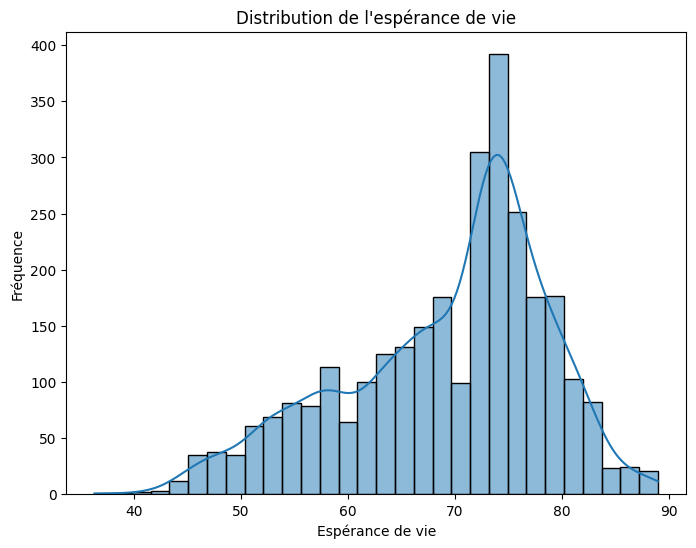

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [23]:

df = pd.read_csv("Life Expectancy Data.csv")
print(df.head())
print(df.describe())
plt.figure(figsize=(8, 6))
sns.histplot(df['Life expectancy '], kde=True)
plt.title("Distribution de l'espérance de vie")
plt.xlabel("Espérance de vie")
plt.ylabel("Fréquence")
plt.show()
print(df.info())

Analyse exploratoire (après le nettoyage)

<ipython-input-24-9d5814294979>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


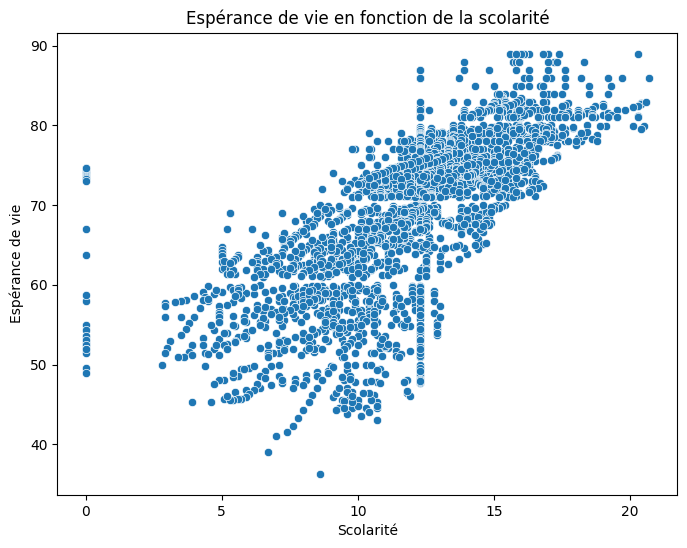

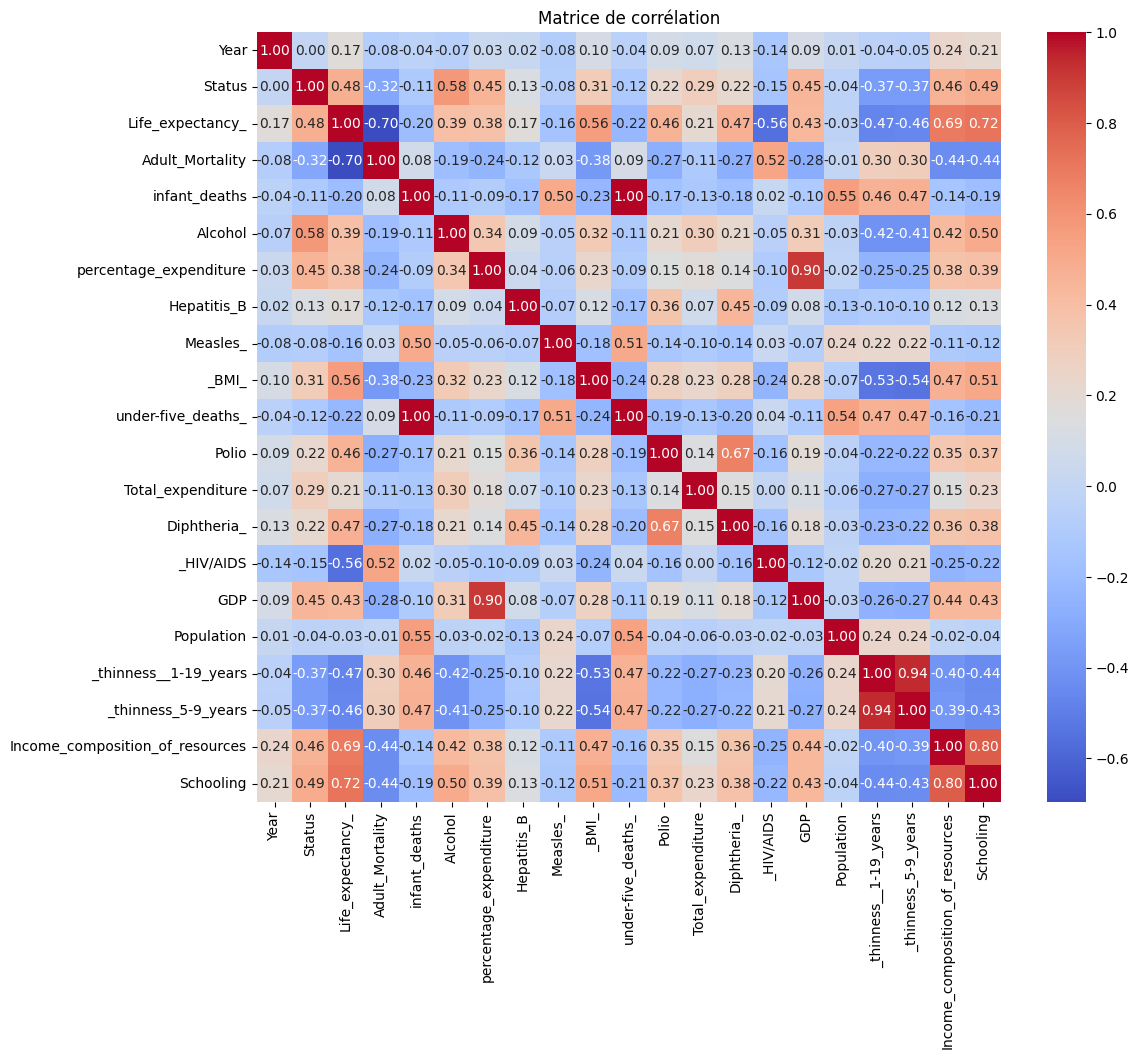

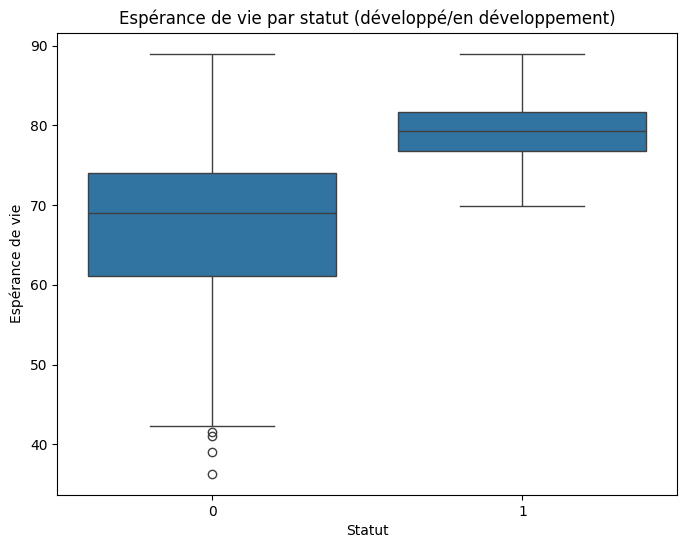

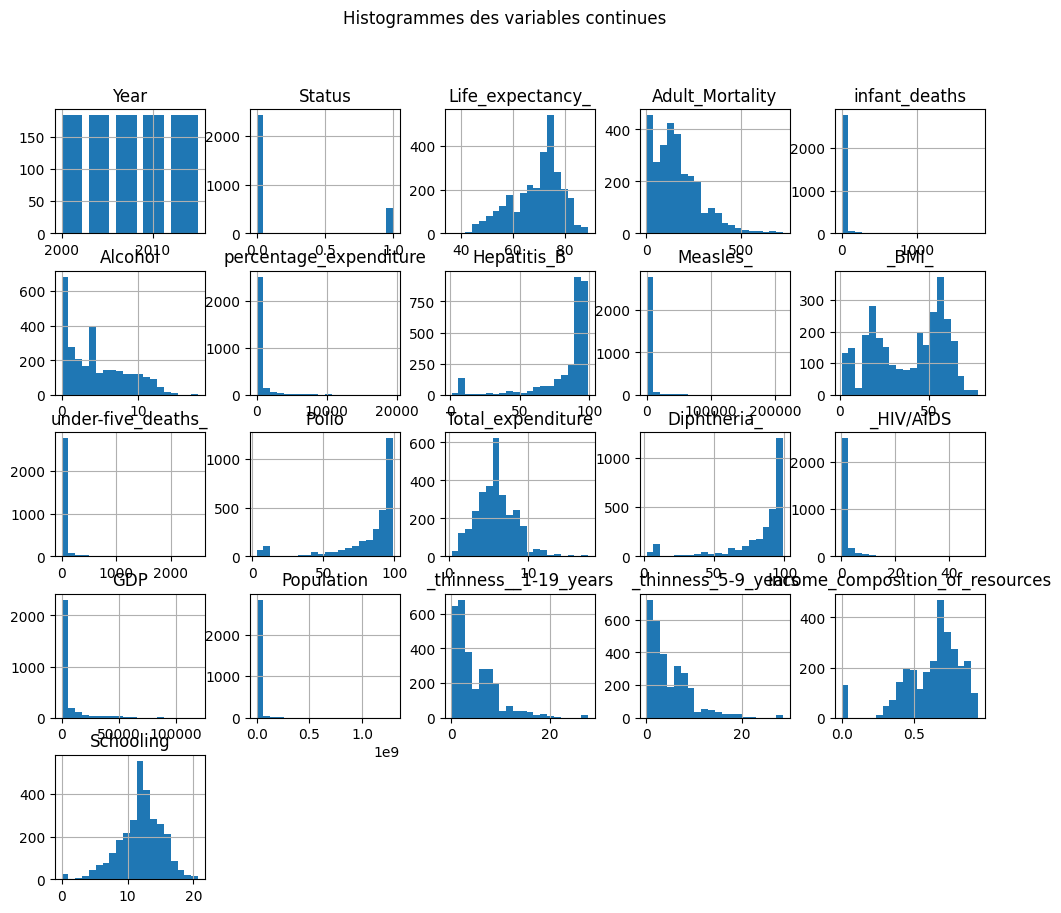

In [24]:

df = pd.read_csv("Life Expectancy Data.csv")
df.columns = df.columns.str.replace(' ', '_')
df.dropna(subset=['Life_expectancy_'], inplace=True)
for col in df.select_dtypes(include=['number']).columns:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
df['Status'] = df['Status'].map({'Developing': 0, 'Developed': 1})

numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(8, 6))
sns.scatterplot(x=numerical_df['Schooling'], y=numerical_df['Life_expectancy_'])
plt.title("Espérance de vie en fonction de la scolarité")
plt.xlabel("Scolarité")
plt.ylabel("Espérance de vie")
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='Life_expectancy_', data=df)
plt.title("Espérance de vie par statut (développé/en développement)")
plt.xlabel("Statut")
plt.ylabel("Espérance de vie")
plt.show()

numerical_df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histogrammes des variables continues")
plt.show()

Construction et validation du modèle

In [25]:

y, X = load_and_prepare_data("Life Expectancy Data.csv")

b = calculate_coefficients(X, y)
b0 = b[0]
b1 = b[1]
print(f"Intercept (b0): {b0:.2f}")
print(f"Pente (b1): {b1:.2f}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
b_train = calculate_coefficients(X_train, y_train)
b0_train = b_train[0]
b1_train = b_train[1]
y_pred = predict(X_test[:, 1], b0_train, b1_train)
r_squared_test = calculate_r_squared(X_test, y_test, b_train)
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print(f"R² sur l'ensemble de test : {r_squared_test:.2f}")
print(f"RMSE sur l'ensemble de test : {rmse:.2f}")

Intercept (b0): 44.00
Pente (b1): 2.10
R² sur l'ensemble de test : 0.55
RMSE sur l'ensemble de test : 6.23


<ipython-input-19-a046f7c28e20>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


Index(['Country', 'Year', 'Status', 'Life_expectancy_', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles_', '_BMI_', 'under-five_deaths_', 'Polio', 'Total_expenditure',
       'Diphtheria_', '_HIV/AIDS', 'GDP', 'Population',
       '_thinness__1-19_years', '_thinness_5-9_years',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')

Le modèle n'est pas très bon haha, ajoutons d'autres variables

<ipython-input-28-e22f4fdd197e>:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


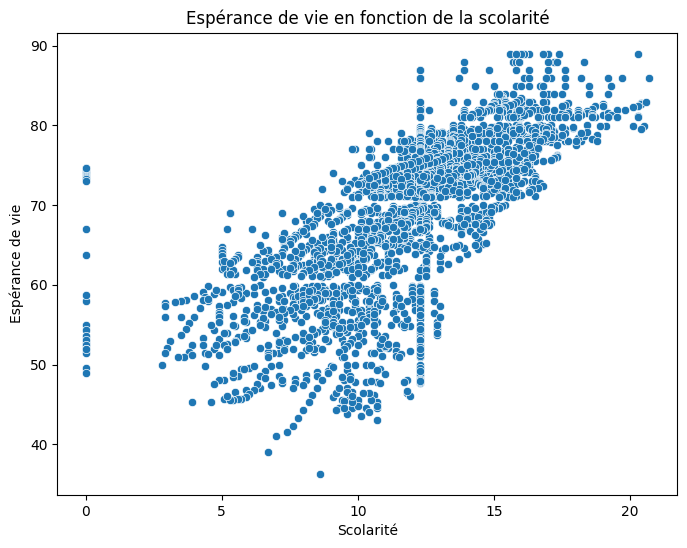

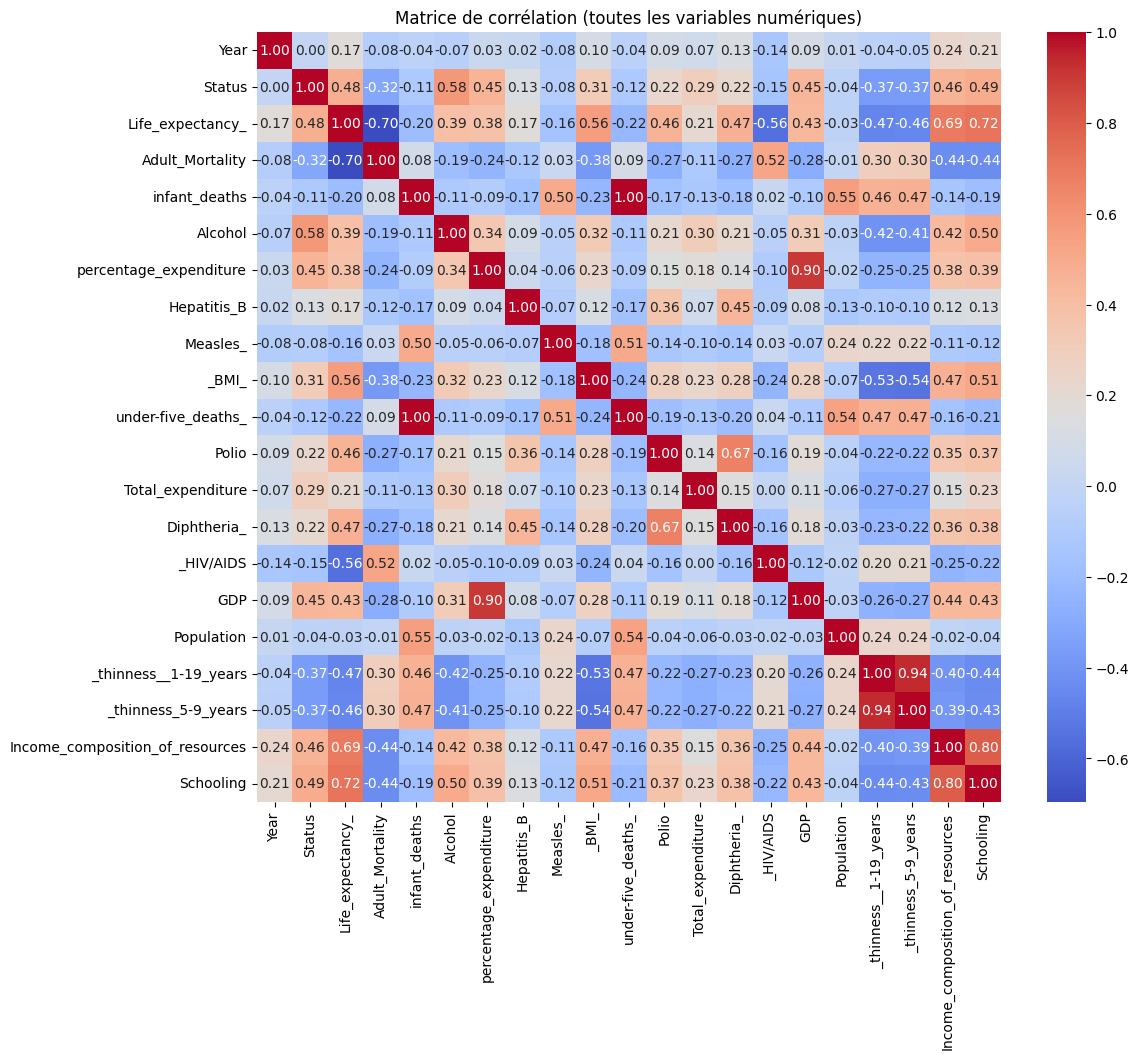

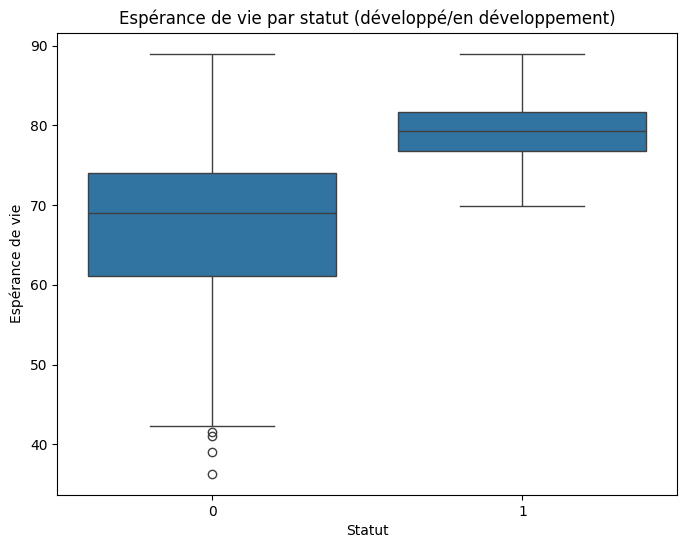

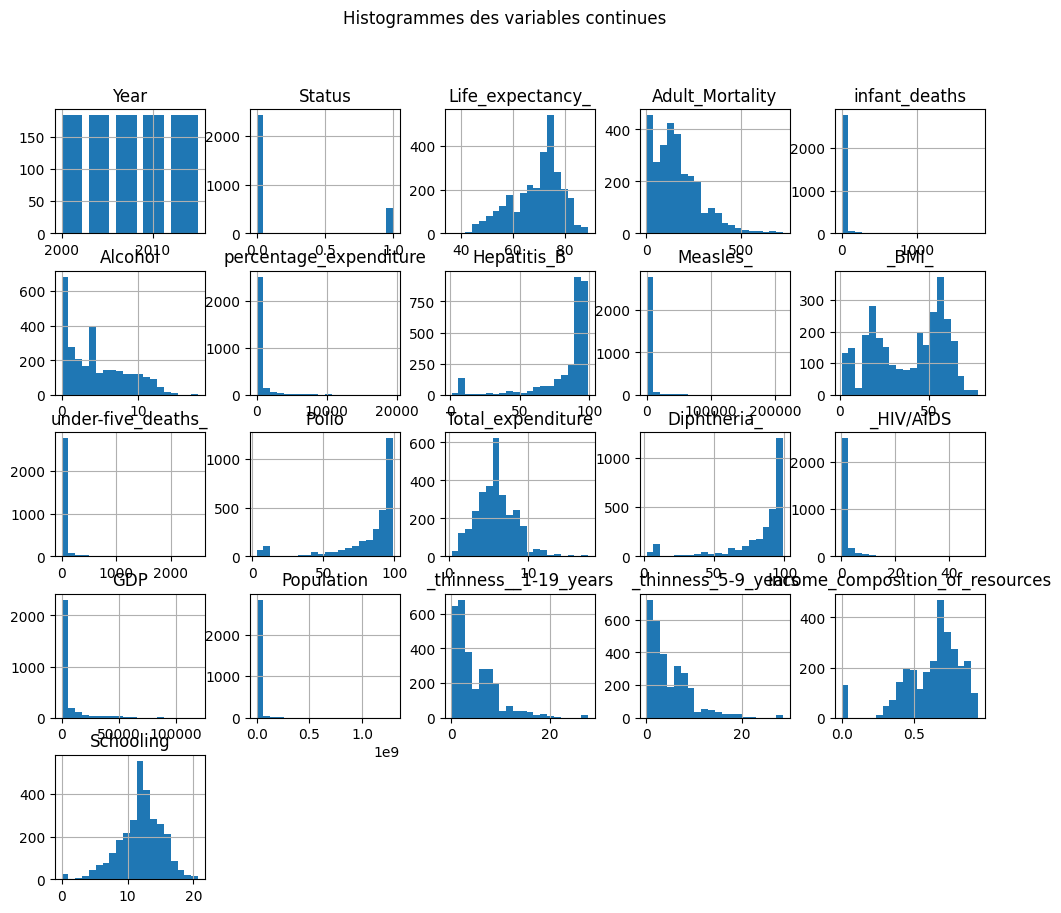

Intercept (b0): 66.23
Coefficients (b1, b2, ...): [-5.33409448e-03  1.45198609e+00 -2.04822368e-02  9.83045438e-02
  7.56406954e-02  5.94200732e-05 -1.69033401e-02 -2.95041445e-05
  4.20734339e-02 -7.26687803e-02  3.06668960e-02  5.12567467e-02
  4.05064817e-02 -4.78636252e-01  4.14723794e-05 -1.17739246e-09
 -9.67470051e-02  6.77814206e-03  5.32469942e+00  6.56046283e-01]
R² sur l'ensemble de test : 0.82
RMSE sur l'ensemble de test : 3.95


<ipython-input-28-e22f4fdd197e>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


In [28]:

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

def load_and_prepare_data(filename):
    df = pd.read_csv(filename)
    df.columns = df.columns.str.replace(' ', '_')
    df.dropna(subset=['Life_expectancy_'], inplace=True)
    for col in df.select_dtypes(include=['number']).columns:
        if df[col].isnull().any():
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
    df['Status'] = df['Status'].map({'Developing': 0, 'Developed': 1})
    y = df['Life_expectancy_'].values
    X = df.select_dtypes(include=['number']).drop('Life_expectancy_', axis=1).values
    X = np.column_stack((np.ones(len(X)), X))
    return y, X

def calculate_coefficients(X, y):
    XT = X.T
    XTX = np.dot(XT, X)
    XTX_inv = np.linalg.inv(XTX)
    XTy = np.dot(XT, y)
    b = np.dot(XTX_inv, XTy)
    return b

def predict(X, b):
    return np.dot(X, b)

def calculate_r_squared(y_true, y_pred):
    y_mean = np.mean(y_true)
    ss_total = np.sum((y_true - y_mean)**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared

df = pd.read_csv("Life Expectancy Data.csv")
df.columns = df.columns.str.replace(' ', '_')
df.dropna(subset=['Life_expectancy_'], inplace=True)
for col in df.select_dtypes(include=['number']).columns:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
df['Status'] = df['Status'].map({'Developing': 0, 'Developed': 1})

numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(8, 6))
sns.scatterplot(x=numerical_df['Schooling'], y=numerical_df['Life_expectancy_'])
plt.title("Espérance de vie en fonction de la scolarité")
plt.xlabel("Scolarité")
plt.ylabel("Espérance de vie")
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation (toutes les variables numériques)")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='Life_expectancy_', data=df)
plt.title("Espérance de vie par statut (développé/en développement)")
plt.xlabel("Statut")
plt.ylabel("Espérance de vie")
plt.show()

numerical_df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histogrammes des variables continues")
plt.show()

y, X = load_and_prepare_data("Life Expectancy Data.csv")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
b_train = calculate_coefficients(X_train, y_train)
y_pred = predict(X_test, b_train)

r_squared_test = calculate_r_squared(y_test, y_pred)
rmse = np.sqrt(np.mean((y_test - y_pred)**2))

In [29]:
print(f"Intercept (b0): {b_train[0]:.2f}")
print(f"Coefficients (b1, b2, ...): {b_train[1:]}")
print(f"R² sur l'ensemble de test : {r_squared_test:.2f}")
print(f"RMSE sur l'ensemble de test : {rmse:.2f}")

Intercept (b0): 66.23
Coefficients (b1, b2, ...): [-5.33409448e-03  1.45198609e+00 -2.04822368e-02  9.83045438e-02
  7.56406954e-02  5.94200732e-05 -1.69033401e-02 -2.95041445e-05
  4.20734339e-02 -7.26687803e-02  3.06668960e-02  5.12567467e-02
  4.05064817e-02 -4.78636252e-01  4.14723794e-05 -1.17739246e-09
 -9.67470051e-02  6.77814206e-03  5.32469942e+00  6.56046283e-01]
R² sur l'ensemble de test : 0.82
RMSE sur l'ensemble de test : 3.95
